In [28]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [29]:
iris = load_iris()

In [30]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [31]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)

In [32]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [33]:
df['target'] = iris.target
df['target_names'] = df.target.apply(lambda x: iris.target_names[x])

In [34]:
df[:-1]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
144,6.7,3.3,5.7,2.5,2,virginica
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica


In [35]:
x = df.drop(['target', 'target_names'], axis = 'columns')
y = df.target

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 50)

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
model = RandomForestClassifier(n_estimators = 150)

In [39]:
model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=150)

In [40]:
y_pred = model.predict(x_test)
y_pred

array([1, 2, 0, 0, 2, 2, 2, 0, 0, 1, 0, 2, 0, 2, 1, 0, 1, 0, 1, 2, 2, 1,
       0, 2, 1, 2, 1, 1, 1, 2])

In [41]:
model.score(x_test, y_test)

0.9333333333333333

Text(95.72222222222221, 0.5, 'Truth')

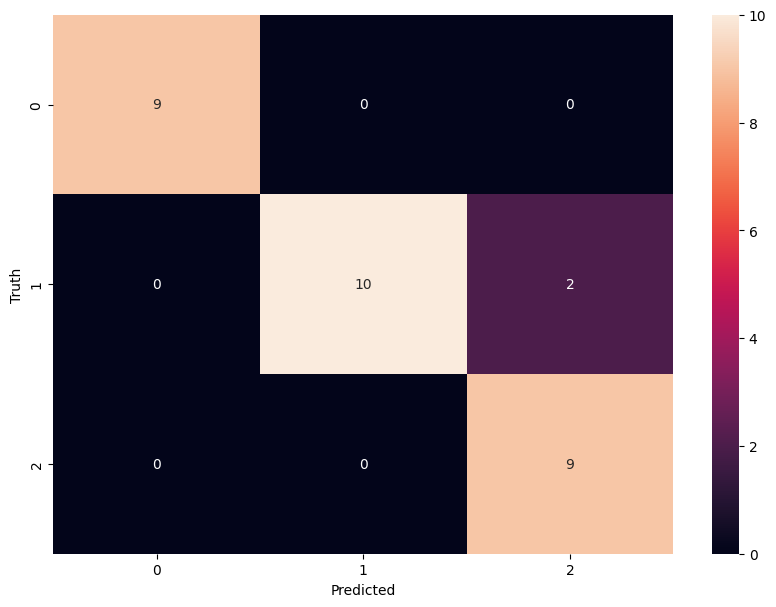

In [42]:
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [51]:
def flower_name(a, b, c, d):
    x = model.predict([[a, b, c, d]])
    return iris.target_names[x[0]]

In [52]:
flower_name(4.9, 3.0, 1.4, 0.2)

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


'setosa'